# Exploring Netflix Data



This notebook follows the [CRISP-DM](https://paginas.fe.up.pt/~ec/files_0405/slides/02%20CRISP.pdf) process to analyze the [Netflix Movies and TV Shows on Kaggle.](https://www.kaggle.com/shivamb/netflix-shows)

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting [report](https://flixable.com/netflix-museum/) which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## Business Understanding

These are the guiding questions that drive this analysis

* In what month of the year, does the most new content arrives on netflix?
* What is the average delay between release of a show and its arrival on netflix.
* How does the different genres relate to the target audience belonging to different age groups?
* Which Country has most content available on netflix?


### Setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from  matplotlib.ticker import FuncFormatter

%matplotlib inline

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [3]:
df = pd.read_csv('netflix_titles.csv')


df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Getting to know Data

First we will have a look at the total number of rows and column in the data

In [4]:
df.shape

(7787, 12)

The data types for every column can be found as:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Below we can see the total missing values in each of the fields.

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

#### Handling Date data

First we will convert the string column to datetime and separate out the month and year columns for our analysis.
For this analysis, we will remove any rows with missing values for the *date_added* column.

In [7]:
df.dropna(subset=['date_added'], inplace=True)
df['date_added'] = pd.to_datetime(df['date_added'])
df['added_year']= df['date_added'].dt.year
df['added_month']= df['date_added'].dt.month_name().str.slice(stop=3)

df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,Aug
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,Dec
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,Dec
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,Nov
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,Jan


### In what month of the year, does the most new content arrives on netflix?

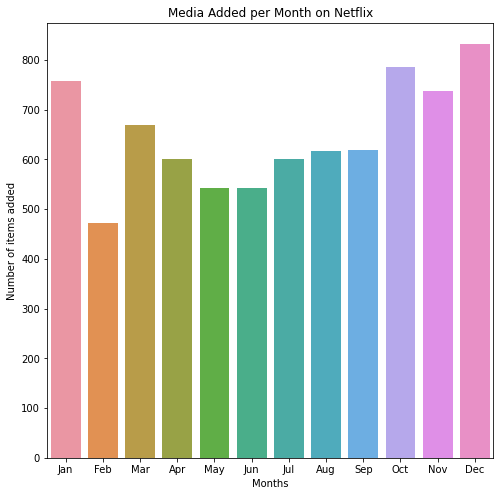

In [8]:
plt.figure(figsize=(8 , 8))
hue_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax = sns.countplot(data=df, x='added_month', order=hue_order)
ax.set(xlabel='Months', ylabel='Number of items added', title='Media Added per Month on Netflix')
plt.show()

The above graph shows the arrival of content each month on netflix. For a better comparison, let's create another graph that displays data for movies and TV shows separately.

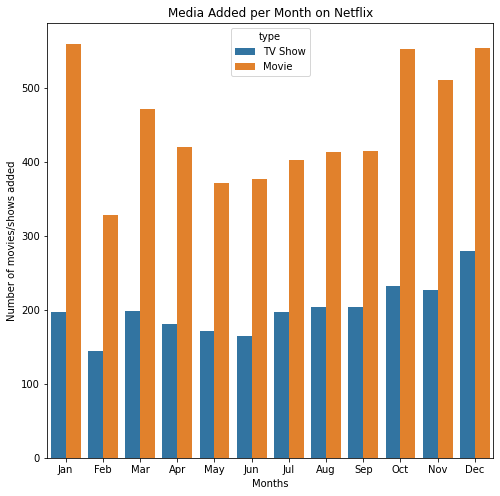

In [9]:
plt.figure(figsize=(8 , 8))
hue_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax = sns.countplot(data=df, x='added_month', order=hue_order, hue='type')
ax.set(xlabel='Months', ylabel='Number of movies/shows added', title='Media Added per Month on Netflix')
plt.show()

From the above graphs, it can be seen that most content gets uploaded to netlflix in December followed by October and then January. This can lead us to conclusion that Netflix adds new data near holiday season.

### What is the average delay between release of a show and its arrival on netflix.


In [10]:
rel_year = df.release_year.value_counts()
add_year = df.added_year.value_counts()

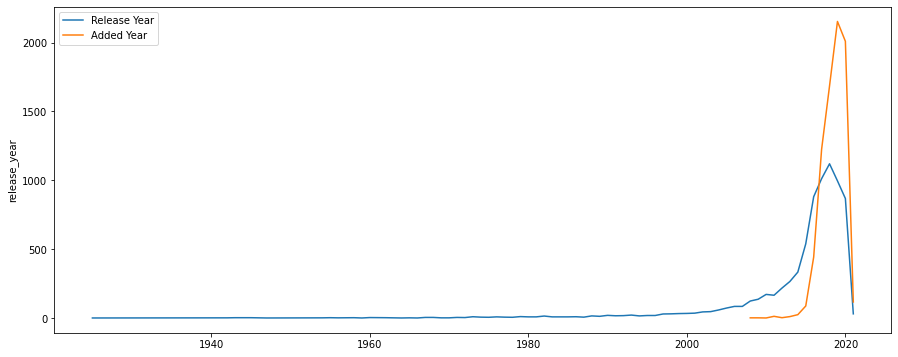

In [11]:

plt.figure(figsize=(15 , 6))
ax = sns.lineplot(data=rel_year)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
sns.lineplot(data=add_year)
plt.legend(['Release Year', 'Added Year'])
plt.show()


As we can see from above graph, Netflix had media that got released in late 1940s, but this graph does not provides any meaningful insight due to the fact of the large difference between oldest data available and release on netflix. Therefore, we take into account only the media added or released during last 2 decades. 

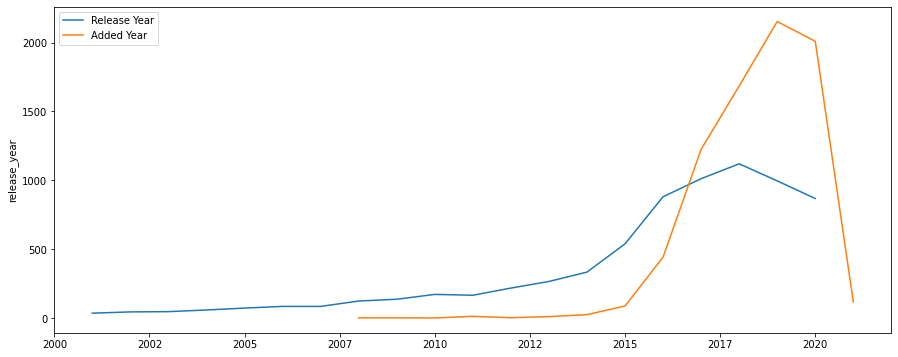

In [12]:
plt.figure(figsize=(15 , 6))
ax = sns.lineplot(data=rel_year[:20])
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
sns.lineplot(data=add_year)
plt.legend(['Release Year', 'Added Year'])
plt.show()

Since there are outliers in the release data, mean might not be the most accurate measure to use here. We therefore plot the median of difference between movies released and added every year since 2000. 
In easy words, This graph will tell us the difference of how many years it took on average for a media released in that year to arrive on netflix.

In [13]:
diff_med  = {}

for i in range(2000, 2021):
    rows = df[df['release_year'] ==i ]
    dif = rows['added_year'].median() - i
    diff_med[i] = dif

diff_median = pd.Series(diff_med)
diff_median
    

2000    19.0
2001    18.0
2002    17.0
2003    16.0
2004    15.0
2005    14.0
2006    13.0
2007    12.0
2008    11.0
2009    10.0
2010     8.0
2011     8.0
2012     6.0
2013     5.0
2014     4.0
2015     2.0
2016     1.0
2017     1.0
2018     0.0
2019     0.0
2020     0.0
dtype: float64

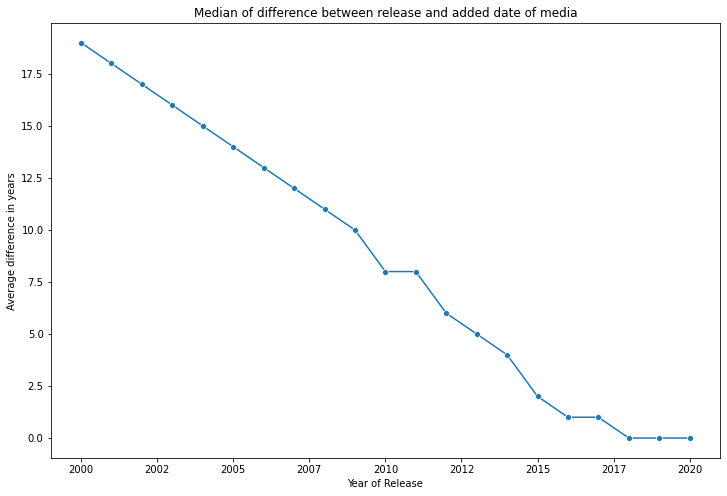

In [14]:
plt.figure(figsize=(12 , 8))
ax = sns.lineplot(data=diff_median, marker='o')
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
ax.set(xlabel='Year of Release', ylabel='Average difference in years', title='Median of difference between release and added date of media')
plt.show()

### How does the different genres relate to the target audience belonging to different age groups?

As we can see from the data, that a media might belong to multiple genres. For reference, we print the first 10 members of the `listed_in` parameter. And then we proceed on to finding all the unique genres.

In [15]:
all_genres = df['listed_in'].unique()
all_genres[:10]

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas', 'International TV Shows, TV Dramas, TV Mysteries',
       'Horror Movies, International Movies, Thrillers',
       'Dramas, Thrillers',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Crime TV Shows, Docuseries, International TV Shows'], dtype=object)

In [16]:
genres_set = set()
for gen in all_genres:
    g = [word.strip() for word in gen.split(',')]
    genres_set.update(g)

genres = list(genres_set)
genres
    

['Dramas',
 'Classic & Cult TV',
 'British TV Shows',
 'Teen TV Shows',
 'Horror Movies',
 'Action & Adventure',
 'Docuseries',
 'Movies',
 'International Movies',
 'Romantic TV Shows',
 'TV Comedies',
 'TV Sci-Fi & Fantasy',
 'TV Thrillers',
 'Crime TV Shows',
 'Sports Movies',
 'Spanish-Language TV Shows',
 'Stand-Up Comedy',
 'Classic Movies',
 'Reality TV',
 'Documentaries',
 'Science & Nature TV',
 'Music & Musicals',
 'Anime Series',
 'Children & Family Movies',
 'Cult Movies',
 'LGBTQ Movies',
 'Thrillers',
 'Anime Features',
 'Romantic Movies',
 'TV Action & Adventure',
 'Faith & Spirituality',
 'TV Horror',
 'TV Mysteries',
 'TV Dramas',
 'Stand-Up Comedy & Talk Shows',
 'Comedies',
 'Korean TV Shows',
 'TV Shows',
 'Sci-Fi & Fantasy',
 "Kids' TV",
 'International TV Shows',
 'Independent Movies']

We then try to find out the total number of shows belonging to each unique genre.

In [17]:
all_genre_list = []
for i in range(len(df)):
    g = [word.strip() for word in df.listed_in.iloc[i].split(',')]
    all_genre_list.extend(g)

genre_counts = {}
for i in all_genre_list:
    genre_counts[i] = all_genre_list.count(i)

genre_counts

{'International TV Shows': 1198,
 'TV Dramas': 703,
 'TV Sci-Fi & Fantasy': 75,
 'Dramas': 2106,
 'International Movies': 2437,
 'Horror Movies': 312,
 'Action & Adventure': 721,
 'Independent Movies': 673,
 'Sci-Fi & Fantasy': 218,
 'TV Mysteries': 90,
 'Thrillers': 491,
 'Crime TV Shows': 426,
 'Docuseries': 352,
 'Documentaries': 786,
 'Sports Movies': 196,
 'Comedies': 1471,
 'Anime Series': 147,
 'Reality TV': 222,
 'TV Comedies': 518,
 'Romantic Movies': 531,
 'Romantic TV Shows': 333,
 'Science & Nature TV': 85,
 'Movies': 56,
 'British TV Shows': 231,
 'Korean TV Shows': 150,
 'Music & Musicals': 321,
 'LGBTQ Movies': 90,
 'Faith & Spirituality': 57,
 "Kids' TV": 412,
 'TV Action & Adventure': 149,
 'Spanish-Language TV Shows': 146,
 'Children & Family Movies': 532,
 'TV Shows': 12,
 'Classic Movies': 103,
 'Cult Movies': 59,
 'TV Horror': 69,
 'Stand-Up Comedy & Talk Shows': 52,
 'Teen TV Shows': 60,
 'Stand-Up Comedy': 329,
 'Anime Features': 57,
 'TV Thrillers': 50,
 'Classi

As we can see, this data is unsorted and is difficult to understand in first glance, we sort the genres in the ascending order, and then plot a bar graph for visual representation.

In [18]:
sorted_genres = dict(sorted(genre_counts.items(), key=lambda item: item[1], reverse=True))
sorted_genres

{'International Movies': 2437,
 'Dramas': 2106,
 'Comedies': 1471,
 'International TV Shows': 1198,
 'Documentaries': 786,
 'Action & Adventure': 721,
 'TV Dramas': 703,
 'Independent Movies': 673,
 'Children & Family Movies': 532,
 'Romantic Movies': 531,
 'TV Comedies': 518,
 'Thrillers': 491,
 'Crime TV Shows': 426,
 "Kids' TV": 412,
 'Docuseries': 352,
 'Romantic TV Shows': 333,
 'Stand-Up Comedy': 329,
 'Music & Musicals': 321,
 'Horror Movies': 312,
 'British TV Shows': 231,
 'Reality TV': 222,
 'Sci-Fi & Fantasy': 218,
 'Sports Movies': 196,
 'Korean TV Shows': 150,
 'TV Action & Adventure': 149,
 'Anime Series': 147,
 'Spanish-Language TV Shows': 146,
 'Classic Movies': 103,
 'TV Mysteries': 90,
 'LGBTQ Movies': 90,
 'Science & Nature TV': 85,
 'TV Sci-Fi & Fantasy': 75,
 'TV Horror': 69,
 'Teen TV Shows': 60,
 'Cult Movies': 59,
 'Faith & Spirituality': 57,
 'Anime Features': 57,
 'Movies': 56,
 'Stand-Up Comedy & Talk Shows': 52,
 'TV Thrillers': 50,
 'Classic & Cult TV': 25,

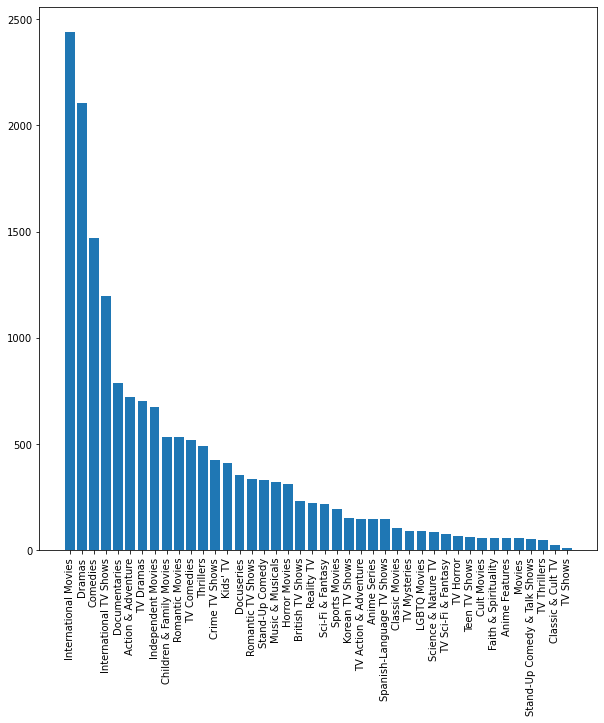

In [19]:
plt.figure(figsize=(10 , 10))
plt.bar(sorted_genres.keys(), sorted_genres.values())
plt.xticks(rotation='vertical')
plt.show()

Since there are total of 42 unique genres, We pick the top 5 most popular genres and plot the various genres the shows belong to.

In [20]:
top5 = list(sorted_genres.keys())[:5]
top5

['International Movies',
 'Dramas',
 'Comedies',
 'International TV Shows',
 'Documentaries']

In [21]:
# df.dropna(subset=['rating'], inplace=True)

In [22]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

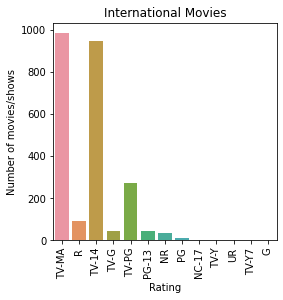

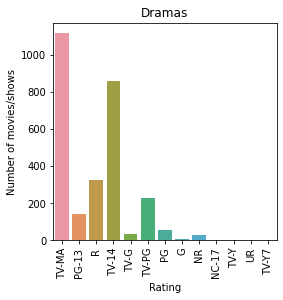

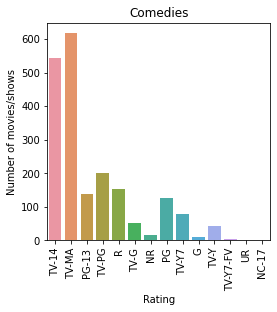

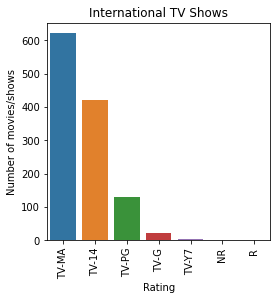

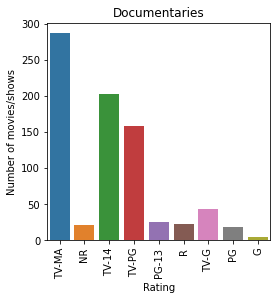

In [23]:
for top in top5:
    plt.figure(figsize=(4 , 4))
    rating_records = df[df['listed_in'].str.contains(top)]
    ax = sns.countplot(data=rating_records, x='rating')
    ax.set(xlabel='Rating', ylabel='Number of movies/shows', title=top)
    plt.xticks(rotation='vertical')
    plt.show()    

### Which Country has most content available on netflix?

For this comparison, we being by dropping records that do not have country data available. Furthermore, we also pick the first country where multiple countries are listed for a better graphical approach.Finally, we plot a pie chart of the top 20 countries with percent of data available. We are not including all countries as the graph becomes difficult to understand.

In [24]:
(df['country'].value_counts())

United States                                                   2549
India                                                            923
United Kingdom                                                   396
Japan                                                            225
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [25]:
df.dropna(subset=['country'], inplace=True)

In [26]:
df['country'] = df.country.str.split(',').str[0]

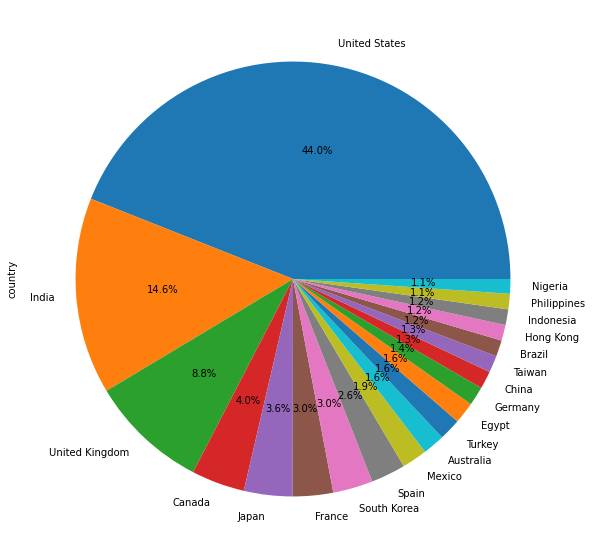

In [27]:
df['country'].value_counts()[:20].plot.pie(autopct='%1.1f%%',figsize=(10,10));

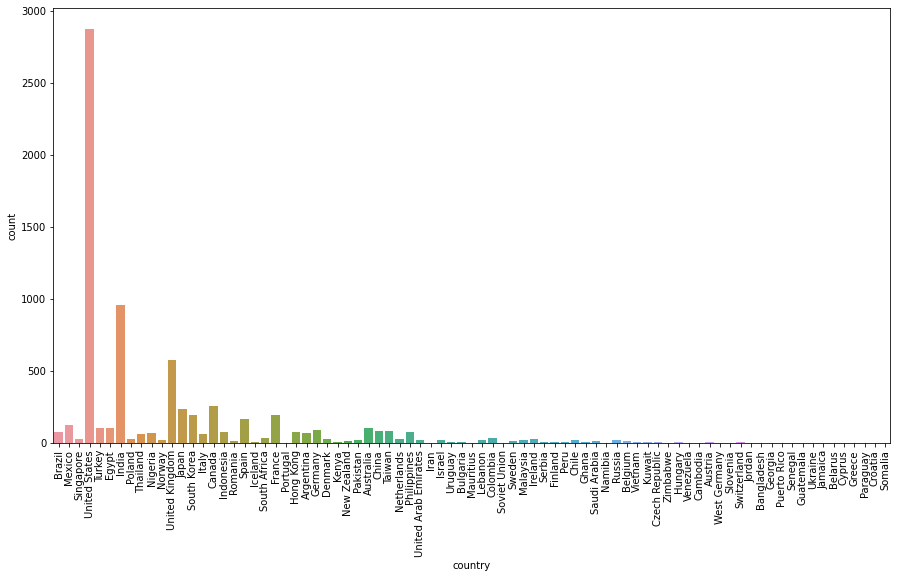

In [28]:
plt.figure(figsize=(15 , 8))
ax = sns.countplot(data=df, x='country')
plt.xticks(rotation='vertical')
plt.show()